## Real Estate Industry Project - Group 7 ##

### Data Collection and Pre-processing ###

Since the scraped data from Domain.com.au was provided to us, once received we immediately began with basic preprocessing. We joined individual property listings with suburb-level attributes, ensuring that each entry contained valid coordinates and SA2 mappings. During this stage, we:

Standardised key identifiers such as SA2_CODE21 to nine digits for consistency across datasets.

Cleaned property attributes (e.g., rent, bedroom type, dwelling type), removing duplicates and handling missing values.

Filtered listings by property type and bedroom count to ensure homogeneity in rental comparisons.

Computed suburb-level statistics such as median rent, mean rent, and rent per bedroom, generating a tidy quarterly panel ready for analysis.

After preprocessing, exploratory analysis was conducted to understand spatial and temporal trends in rent distribution. Using data_analysis_domain1.ipynb and data_analysis_domain2.ipynb, we:

Visualised rental variations across SA2 regions using geospatial choropleths.

Examined correlations between rent, population, income, and crime rates.

Identified regional outliers and hotspots showing strong rental growth patterns.

## Contextual Data Collection ##

In parallel to processing the Domain.com.au property listings, we collected contextual datasets to better explain the drivers of rental variation and affordability across Victoria’s SA2 regions. These datasets capture the socio-economic and environmental factors that influence liveability and rental demand.

**Key contextual features integrated into the modelling pipeline included:**

- **Population growth (ERP Quarterly)** — represents demand-side pressure from demographic expansion.  
- **Median income (Income Quarterly)** — captures household affordability and spending capacity.  
- **Crime rates (per 100k residents)** — sourced via LGA-to-SA2 correspondence, indicating local safety perceptions.  
- **Public transport accessibility** — proximity to train stations, tram stops, and other transit nodes.  
- **CBD distance** — calculated from each SA2 centroid to Melbourne’s CBD, serving as a proxy for locational convenience.  
- **Parks, recreation, and amenities** — represent quality-of-life indicators around green spaces and leisure facilities.  
- **Educational access** — presence of schools, universities, and hospitals in or near each SA2.  
- **Retail and shopping centres** — indicative of commercial activity and local infrastructure support.  
- **Median rent per suburb** — represents typical rental prices within each area, serving as an indicator of local affordability and housing demand.

By merging these contextual variables with the rental data, we aimed to produce a holistic spatial understanding of rental dynamics—moving beyond property features alone to incorporate environmental and socio-economic determinants of rent growth and affordability.


### APIs LEVERAGED ###

We also leveraged a few APIs and libraries for different purposes.  
Specifically, we used the [**OpenRoute Service API**](https://openrouteservice.org/) and the **Google Maps API** to calculate distances between each property and its corresponding features of interest.  
Additionally, [**OpenStreetMap**](https://www.openstreetmap.org/) was utilised to obtain the nearest coordinates of features of interest for each property. For modelling, we employed [**Statsmodels**](https://www.statsmodels.org/stable/index.html) to implement statistical forecasting models such as [**SARIMAX**](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html), [**ARIMA**](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html), and [**Unobserved Components Model (UCM)**](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.structural.UnobservedComponents.html).


## Question 1 ##

### What are the Most import Internal and External Features ##

# Note : @ tasneem Need to reproduce code below - Instead of Top 20 only show Top 10 # 

In [1]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Create a larger and clearer figure
fig, ax = plt.subplots(figsize=(10, 8))

# Plot top 20 features by gain
plot_importance(
    xgb_final, 
    ax=ax, 
    max_num_features=20, 
    importance_type="gain", 
    height=0.6, 
    show_values=False  
)

# Make the chart look cleaner
ax.set_title("Top 20 Feature Importances (by Gain)", fontsize=14, pad=15)
ax.set_xlabel("Average Gain", fontsize=12)
ax.set_ylabel("Feature", fontsize=12)
ax.grid(alpha=0.3, linestyle="--")

# Increase font size for y-axis labels
for label in ax.get_yticklabels():
    label.set_fontsize(10)

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'xgboost'

### Top 10 Most Important Features

The chart above highlights the top 10 most influential factors contributing to rental price prediction. These features can be broadly grouped into three key categories:

- **Property structure** — including *bedrooms*, *bathrooms*, and their *interaction (bed_bath)*, which together form the strongest predictors of rental value.  
- **Location and accessibility** — such as *travel time to CBD*, *car spaces*, *gyms*, and *swimming pools*, capturing convenience and lifestyle appeal.  
- **Socio-economic and demographic factors** — like *income*, *crime rate*, and *population density*, representing affordability and neighbourhood characteristics.


### Recommendations

**For Renters:**  
- Evaluate affordability by comparing personal income with the median income levels of the suburb.  
- If planning to stay long-term, target suburbs with **stable or slower rent growth** for better financial sustainability.  
- Balance **location and cost** by identifying trade-offs between proximity to the city and rental affordability.

**For Investors:**  
- Focus on **high-growth suburbs**, particularly those close to the CBD and key amenities such as schools and gyms.  
- Prioritise properties with **larger structures (more bedrooms and bathrooms)** to maximise rental returns.  

**For Policymakers:**  
- Strengthen **educational and transport infrastructure** in emerging suburbs to attract both renters and investors.  
- Support community safety and public amenities to enhance suburb liveability and long-term rental market stability.


# Question 2 : What are the top 10 suburbs with the highest predicted growth rate? #

Next, we turn our attention to **suburbs with strong investment potential**, focusing on those expected to experience **significant rental price growth**.  

To identify these high-growth areas, we applied **ARIMA**, **SARIMAX**, and **UCM** time-series models, which leverage **historical trends**, **growth patterns**, and **seasonal dynamics** to forecast rental prices for the next three years.


# @ amanda - please produce the top 10 SA2 growth bar chart below please ##

In [8]:
# put the code for the bar chart here 





### Where Rents Are Growing

Our SA2 growth model highlights a blend of **inner-city and fringe suburbs** showing strong growth potential — areas like **North Melbourne** and **West Melbourne** benefit from job proximity and lifestyle appeal, while **outer growth corridors** such as **Pakenham** are driven by expanding demand.



###  Rental Potential Hotspots

Combining property-level and regional insights reveals that the **highest rental potential** lies in **coastal and leafy outer suburbs** such as **Brighton** and **Emerald**, where **larger homes** and **higher-income residents** dominate the market.


### @ amanda - provide code for line graph for all top 10 SA2 growth here to show that all have steady growth ###

In [10]:
# paste code here

###  SA2 Modelling & Key Insights

We trained multiple time-series models such as UCM , ARIMA and SARIMAX with **SARIMAX** emerging as the best performer, achieving an **average prediction error of just \$13.50**.  
Overall, the models effectively capture how rents vary by **property attributes** and **regional characteristics**.


### @ amanda - provide the model comparison graph here to show differnce in model performance ###

In [9]:
# Insert code to plot here 

# Question 3: Where are the most liveable and affordable suburbs? #


### **Affordability** ###

###  Affordability Ratio

For affordability, we define it as the **percentage of an individual's annual income spent on rent**.  
A **lower ratio indicates greater affordability**, meaning rent takes up a smaller share of income.  

Using this metric allows for a **fair comparison of housing costs** across different suburbs.  
However, since the income data reflects **individual (not household) income**, this calculation **overstates rental stress** in metropolitan areas and **understates it** for multi-income households.

<br>

<div align="center">

$$
\textbf{Affordability Ratio} =
\frac{\text{Annual Rent}}{\text{Predicted Individual Income}_{2025}}
$$

</div>


In [ ]:
# Save and show
m.save("affordability_map_interactive_2025.html")
print(" Map saved as affordability_map_interactive_2025.html")
m


## Note - need to reproduce map above @ ariq ##

if too large when push - then maybe can just have a screenshot of it (?)

### Affordability Map Insights

The map groups SA2 regions by affordability, with **green indicating more affordable areas** and **red indicating less affordable ones**.  
Notably, **Flinders** on the Mornington Peninsula appears bright red, showing an affordability ratio exceeding 100%.  

While this seems unrealistic at first glance, it reflects the suburb’s **unique market dynamics** — high median rents driven by **holiday homes, premium coastal properties, and luxury multi-bedroom houses**.  
Thus, the extreme value highlights how **tourism and high-end housing markets** can distort affordability metrics in certain regions.


         SA2_NAME21  avg_affordability_ratio
0      Yarriambiack                 0.257058
1            Loddon                 0.262973
2           Highton                 0.316335
3  Belgrave - Selby                 0.324850
4     Sunshine West                 0.327227


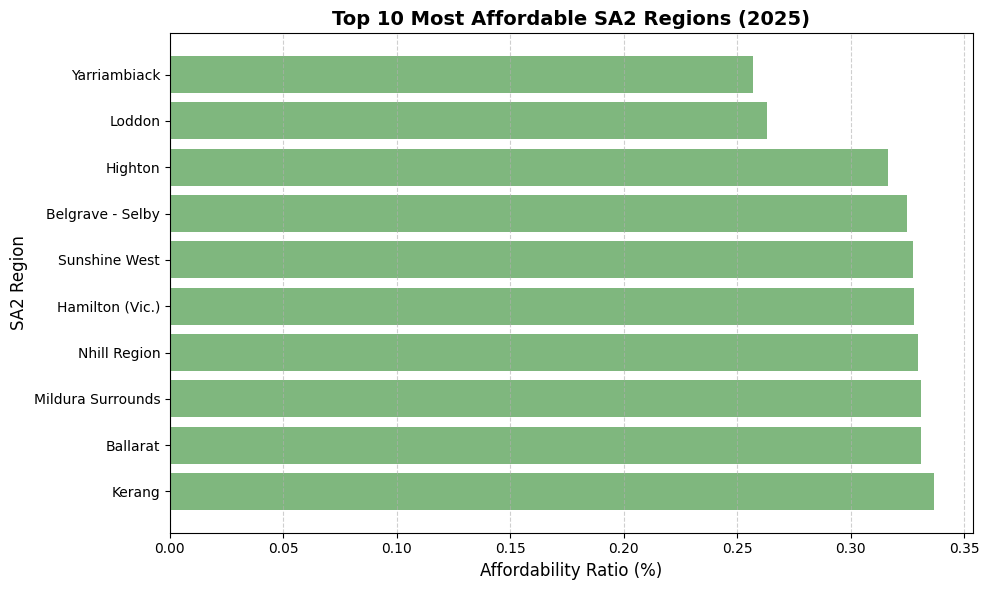

In [ ]:
# %% Plot Top 10 Most Affordable SA2s
import pandas as pd
import matplotlib.pyplot as plt

# --- Load dataset ---
csv_path = "/Users/rajaa/Desktop/Applied Data Science MAST30034/project-2-group-real-estate-industry-project-7-2025/Raja-workspace/top10_affordable_sa2_2025.csv"
df = pd.read_csv(csv_path)

# --- Inspect columns ---
print(df.head())

# --- Sort by affordability (ascending = more affordable) ---
df = df.sort_values(by=df.columns[1], ascending=True)   

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.barh(df.iloc[:, 0], df.iloc[:, 1], color="#7FB77E")  
plt.xlabel("Affordability Ratio (%)", fontsize=12)
plt.ylabel("SA2 Region", fontsize=12)
plt.title("Top 10 Most Affordable SA2 Regions (2025)", fontsize=14, weight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()


### Top 10 Most Affordable SA2s

The top 10 most affordable SA2s in Victoria are predominantly **regional and outer suburban areas**, located **beyond Melbourne’s metropolitan zone**.  
This reflects how **affordability improves with distance from the city**, where rental prices are lower and housing supply is less constrained.


# **Liveability** ##

###  Liveability

A composite index combining three key dimensions:

- **Amenities access** — proximity and availability of essential facilities such as transport, schools, shops, and healthcare.  
- **Safety** — measured using **crime rate**, where higher crime implies lower liveability.  
- **Affordability** — measured using the **rent-to-income ratio**, indicating housing cost pressure.

<br>

<div align="center">

$$
\textbf{Liveability Score} =
0.4 \times \text{Amenities}_{\text{norm}} +
0.3 \times (1 - \text{Crime}_{\text{norm}}) +
0.3 \times (1 - \text{Affordability}_{\text{norm}})
$$

</div>

**Notes:**  
- “norm” indicates that each variable is **normalised between 0 and 1** 
- **Crime** and **Affordability** are inverted since higher values reduce liveability.  
- The chosen weights (0.4, 0.3, 0.3) emphasise **amenities** slightly more, while keeping **safety** and **affordability** balanced.  




###  Interpretation

- **Higher scores** indicate greater liveability, reflecting better access to amenities, lower crime, and higher affordability.  
- SA2s with **high amenity access and low crime rates** tend to dominate the upper end of the index.  
- Areas with **high rent-to-income ratios** or **elevated crime levels** score lower, signalling potential housing or safety challenges.  
- When mapped geographically, this score helps **visualise spatial inequality** in liveability across Victoria.  



###  Caveats and Limitations

- **Weighting sensitivity:** Results depend on the 0.4/0.3/0.3 weights — changing them alters rankings.  
- **Data scale:** Different normalisation methods (e.g., z-scores) could shift relative results.  
- **Affordability bias:** Income data reflects **individual earnings**, not household income — overstating stress in metro areas and understating it in multi-income households.  
- **Temporal lag:** Amenity and crime data may not fully align with the most recent rental figures.  
- **Local context:** Quantitative indices cannot fully capture **qualitative aspects** of liveability (e.g., community cohesion or environmental quality).  


In [ ]:
# Save interactive map
# Create interactive Folium map
m = folium.Map(location=[-37.8, 145.0], zoom_start=7, control_scale=True)

choropleth = folium.Choropleth(
    geo_data=geojson_data,
    data=sa2_vic_merged,
    columns=["SA2_CODE21", "livability_score"],
    key_on="feature.properties.SA2_CODE21",
    fill_color="YlGn",
    fill_opacity=0.8,
    line_opacity=0.4,
    nan_fill_color="gray",
    legend_name="Livability Score (0–1)"
).add_to(m)

tooltip = GeoJsonTooltip(
    fields=["SA2_NAME21", "avg_affordability_ratio", "CrimeRate_2025", "foi_count", "livability_score"],
    aliases=["SA2:", "Affordability Ratio:", "Crime Rate:", "Amenities Count:", "Livability Score:"],
    sticky=False
)
choropleth.geojson.add_child(tooltip)

m.save("livability_index_interactive_2025.html")

m

## @ ariq - pls reproduce map above ##

if too large when push - then maybe can just have a screenshot of it (?)

Columns: ['SA2_NAME21', 'livability_score', 'CrimeRate_2025', 'avg_affordability_ratio', 'foi_count']


,SA2_NAME21,livability_score,CrimeRate_2025,avg_affordability_ratio,foi_count
0,Loddon,0.822595,8286.653356,0.262973,758.0
1,Glenelg (Vic.),0.818202,2990.531906,0.634230,832.0
2,Moyne - West,0.791717,0.000000,0.505405,579.0
3,Mildura Surrounds,0.777488,3822.980111,0.330788,557.0
4,Alexandra,0.760708,0.000000,0.371937,418.0


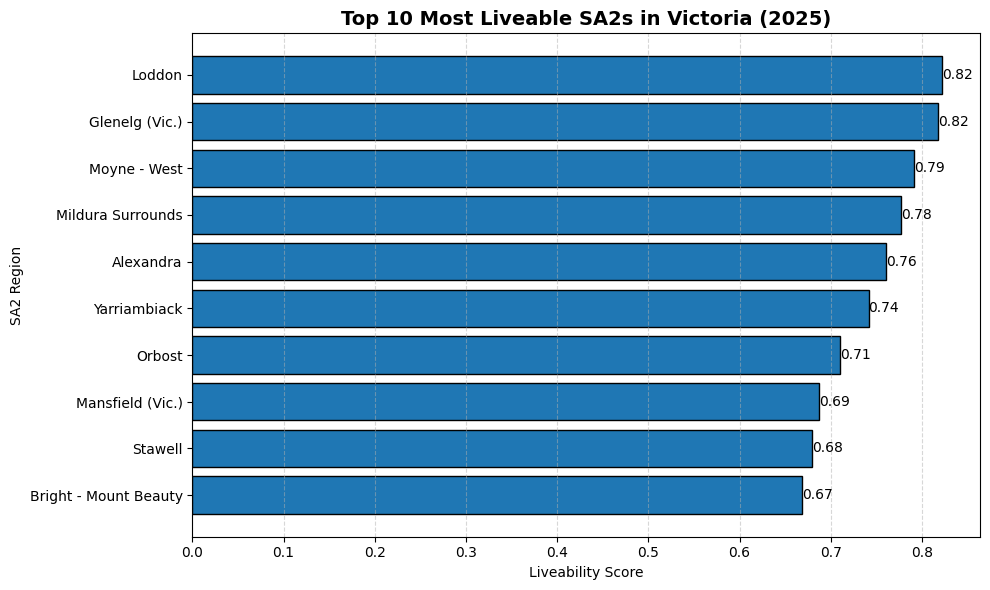

In [6]:
# %% Robust plot for Top 10 Most Liveable SA2s
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "/Users/rajaa/Desktop/Applied Data Science MAST30034/project-2-group-real-estate-industry-project-7-2025/Raja-workspace/top10_livable_sa2_2025.csv"

# 1) Load & inspect
df = pd.read_csv(csv_path)
print("Columns:", list(df.columns))
display(df.head())

# 2) Pick columns safely
# Try to infer SA2 name and score columns; otherwise use 1st (name) and 2nd (score) as you said
name_candidates = [c for c in df.columns if ("SA2" in c.upper() and "CODE" not in c.upper()) or "NAME" in c.upper()]
score_candidates = [c for c in df.columns if "live" in c.lower() or "score" in c.lower()]

name_col = name_candidates[0] if name_candidates else df.columns[0]
score_col = score_candidates[0] if score_candidates else df.columns[1]  # 2nd column = livability_score

plot_df = df[[name_col, score_col]].copy()
plot_df.columns = ["SA2_NAME21", "Liveability_Score"]

# 3) Sort ascending so best appears at top after invert_yaxis
plot_df = plot_df.sort_values("Liveability_Score", ascending=False)

# 4) Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(
    plot_df["SA2_NAME21"],
    plot_df["Liveability_Score"],
    edgecolor="black"
)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f"{width:.2f}", va="center", ha="left", fontsize=10)

plt.title("Top 10 Most Liveable SA2s in Victoria (2025)", fontsize=14, fontweight="bold")
plt.xlabel("Liveability Score")
plt.ylabel("SA2 Region")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.gca().invert_yaxis()  # highest score at top
plt.tight_layout()
plt.show()


### Liveability Insights

Interestingly, the **most liveable areas** identified by our index are **rural rather than inner-city suburbs**.  
These regions stand out for being **more affordable** and **safer**, with **lower crime rates**.  
Although they offer **fewer amenities**, they still provide a strong baseline of **essential services**, contributing to overall liveability.


# Challenges experienced : #

1. The 2,000-request daily cap of the ORS API made it difficult to handle more than 10,000 property records. We addressed this by using batched queries, caching previous results, and aggregating requests to stay within the limit efficiently.
2. A discrepancy between SA2 codes and suburb names initially caused alignment issues, which we resolved by linking each suburb to its corresponding SA2 code, ensuring uniformity across all datasets and analyses.

## Assumptions


### 1. Market Stability
The analysis assumes a stable economic and social environment.  
No major global or domestic disruptions — such as financial crises, pandemics (e.g., COVID-19), or policy shocks — are expected to significantly alter the housing market dynamics during the forecast period.  
This stability is essential for maintaining consistent relationships between economic indicators and rental prices.

### 2. Policy Consistency
It is assumed that current housing, zoning, and taxation policies remain consistent throughout the projection period.  
No major reforms in property tax structures, rental regulations, or government incentives are anticipated, as such policy shifts could materially influence both rental demand and supply patterns.

### 3. Static Infrastructure
The model is based on current infrastructure and amenity availability.  
It does not account for potential **future developments**, such as:
- New construction projects or residential expansions  
- Planned or ongoing **transportation improvements** (e.g., new train lines or highway upgrades)  
- Additional **points of interest (POIs)** or public facilities (schools, hospitals, shopping centres) that could influence local desirability or rent levels  
As a result, forecasts are based on existing built environments rather than projected urban growth.

### 4. Structural Continuity
The model assumes that the **relationships between predictors and rental prices** remain stable over time.  
For instance, variables such as income, proximity to the CBD, and property features are expected to maintain similar effects on rent levels.  
Sudden shifts in behavioural trends, migration patterns, or technology-driven housing preferences are not captured within this framework.

##  Recommendations

Our analysis suggests that **properties with more bedrooms and over two bathrooms** tend to experience **faster rental growth**.  

- For **maximum investment returns** over the next five years, areas like **Emerald** and **Pakenham** offer strong growth potential.  
- For those aiming for **higher rental income**, **luxury and coastal suburbs** such as **Brighton** and **Sandringham** are recommended.  
- Regardless of location, it’s important that properties include **key value-adding features** identified earlier — such as multiple bathrooms, lifestyle amenities, and proximity to essential services.





##  Business Impact Across Stakeholders

This project delivers **actionable insights** across multiple sectors:

- **Property Investors & Developers** — identify **high-yield suburbs** and anticipate **future rent growth**.  
- **Government & Urban Planners** — leverage **affordability metrics** to guide **housing policy and infrastructure planning**.  
- **Financial Institutions** — use **rental forecasts** to improve **lending, valuation, and mortgage risk strategies**.  
- **Data Firms & PropTech Startups** — integrate or **license forecasting APIs** for real-time market insights.


## Security & Privacy

Given the integration of multiple public and private datasets, **data governance and security** are critical for long-term sustainability. 

- **Secure Communication:** All internal data exchanges were conducted through **end-to-end encrypted channels (WhatsApp)**, ensuring privacy and confidentiality of shared materials.  
- **Local API Key Management:** All API credentials — particularly for **OpenRouteService** — were securely stored **offline in local `.env` files** and never shared or uploaded to public repositories.
- **Compliance & Ethics:** The team operated in line with **Australian Privacy Principles (APPs)** and industry **ethical data handling standards**, ensuring responsible and transparent data use.  



##  Feasibility

This project demonstrates strong **long-term feasibility** — it is **scalable, sustainable, and cost-effective** once the automated data pipeline is fully established.  
Automation reduces manual overhead while enabling continuous model updates and data refresh cycles.




## Limitations

1) **Time Constraints**  

**Impact:**  
The limited project timeframe restricted extensive model experimentation and hyperparameter tuning.  
This may have reduced the model’s ability to fully capture complex temporal patterns in rental price movements.  

**For Future:**  
Extend the modelling period to allow for deeper testing, cross-validation, and comparison across alternative forecasting approaches such as machine learning ensembles or hybrid models.


2) **Data Quality & Availability**  

**Impact:**  
Inconsistencies between geographical levels (e.g., SA2 vs LGA boundaries) and incomplete income data beyond 2023 may have led to minor aggregation errors or underrepresentation of certain suburbs.  

**For Future:**  
Use harmonised boundary datasets or perform geospatial reallocation using correspondence files.  
Seek updated income and demographic data from newer census or administrative sources to improve temporal consistency.



3) **Public Data Gaps**  

**Impact:**  
The absence of certain relevant datasets (e.g., planned transport upgrades, infrastructure pipelines, or new developments) may result in forecasts that do not reflect future urban growth or accessibility improvements.  

**For Future:**  
Integrate external infrastructure and planning datasets once available, or simulate future scenarios using projected transport and construction data to improve predictive robustness.


4) **Temporal Misalignment**  

**Impact:**  
Rental data was available quarterly, while socioeconomic indicators (e.g., income, population, crime) were annual.  
Interpolating values to align timeframes may introduce small temporal distortions, reducing short-term predictive accuracy.  

**For Future:**  
Prioritise datasets with consistent temporal granularity or develop advanced time alignment techniques, such as mixed-frequency models, to better handle mismatched time intervals.




## Future Directions

Looking ahead, several expansions can enhance the project’s scope:

- **Integrate richer datasets**, such as **planned infrastructure projects** and **interest rate data**.  
- **Increase spatial resolution**, analysing rent variations **within suburbs** (block-by-block granularity).  
- **Scenario testing** — simulate **extreme market events**, like population surges or interest rate shocks.  
- **Automated data updates** — build a **real-time dashboard** to monitor market trends and model outputs continuously.




##  Conclusion

This project demonstrates how a data-driven approach can deliver **meaningful insights into Victoria’s rental market**, supporting **investors, policymakers, and financial stakeholders** alike.  
With further data integration, automation, and scaling, this framework can evolve into a **robust, real-time real-estate analytics platform** for the future.
